In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Hp\Documents\ACM_Assignment-1\CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data=df.drop(columns=['seller_type'])
print(data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
dtype: int64


In [9]:
X=pd.get_dummies(df.drop('selling_price',axis=1), drop_first=True)
y=data['selling_price']
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [12]:
y_prediction=model.predict(X_test_scaled)
r2=r2_score(y_prediction,y_test)
m=mean_squared_error(y_prediction,y_test)
print(r2)
print("MSE=",m)

0.2119340478547106
MSE= 138851715545.9258


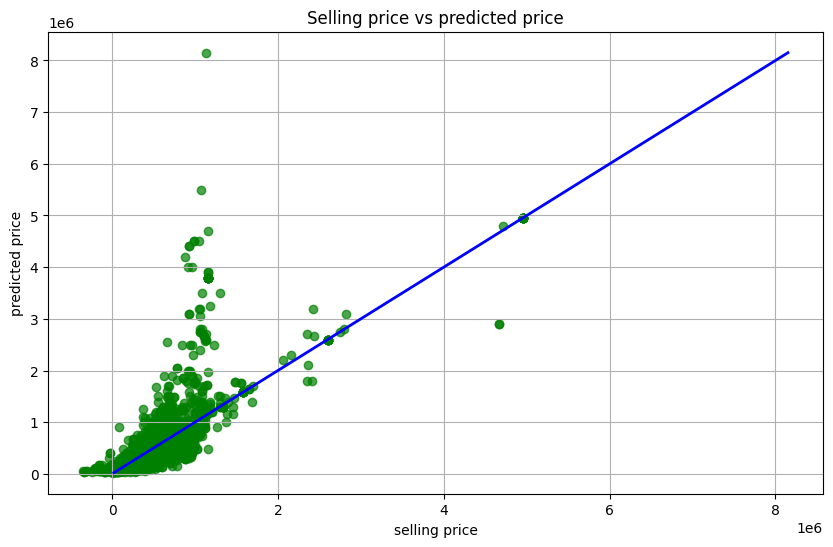

In [13]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(y_prediction,y_test,alpha=0.7,color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='blue',lw=2)
plt.xlabel('selling price')
plt.ylabel('predicted price')
plt.title('Selling price vs predicted price')
plt.grid(True)
plt.show()


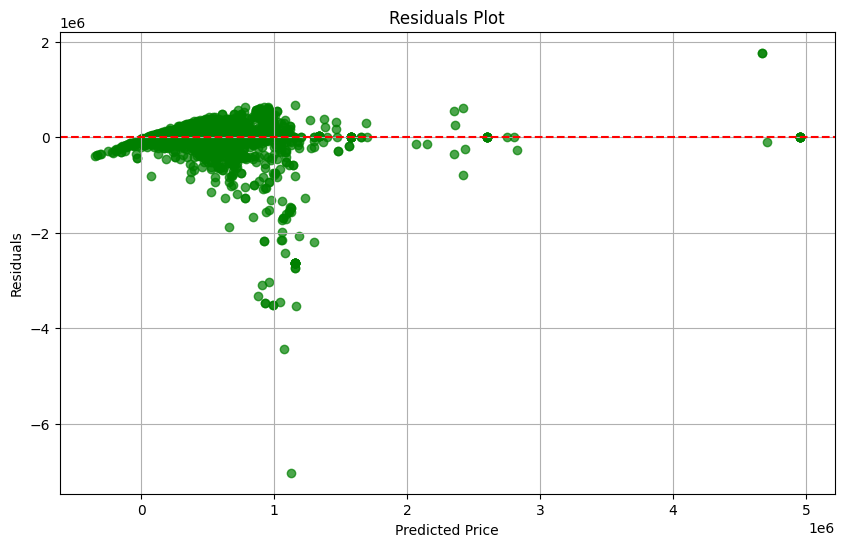

In [14]:
plt.figure(figsize=(10,6))
residuals= y_prediction-y_test
plt.scatter(y_prediction, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [ ]:
input_df = pd.DataFrame([{
    'name': 'Maruti 800 AC',
    'year': 2007,
    'km_driven': 70000,
    'fuel': 'Petrol',
    'transmission': 'Manual',
    'owner': 'First Owner'
}])
input_encoded = pd.get_dummies(input_df, drop_first=True)
input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)
input_scaled = scaler.transform(input_encoded)
y_pred = model.predict(input_scaled)
print("Predicted Selling Price:", y_pred[0])

Predicted Selling Price: 712048.3527667525
